In [40]:
import pandas as pd
import numpy as np

# Modelo Recurrentes con Embeddings a nivel de caracter

In [41]:
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [42]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910


# Canonical_smiles To secuence

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [44]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')

tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [45]:
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Utilizando Tokenizer y pad_sequences de keras a nivel de caracter, obtener la entrada tokenizada. Por ejemplo:

**El smiles**:

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

**Tendría que quedar algo asi (puede que no sea exacto):**

array([ 2, 11,  2, 13, 13, 12,  5,  7,  2,  2, 11,  2, 13, 16, 12, 10, 11,
        2, 13, 12, 15,  3,  2,  4,  2,  2,  2, 11,  2, 13, 13, 12, 23,  3,
        2,  4,  2,  3,  9,  6,  4,  6,  2,  2, 11,  8, 21, 12,  3,  2,  4,
        3,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  8, 21, 12,  3,
        2,  4,  3,  2,  4,  2,  2,  6,  2,  3,  9,  6,  4, 11,  2, 13, 12,
       30,  3,  2,  4,  2,  2,  2, 11,  2, 13, 12, 35,  3,  2,  4, 11,  2,
       13, 13, 16, 12, 30,  2,  2, 11,  2, 13, 13, 12, 30, 36,  2, 11,  2,
       13, 13, 16, 12,  3,  6,  2,  3,  9,  6,  4,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  9,  6,  4,  6, 11,  2, 13, 13, 16, 12,  5,  2, 11,
        2, 13, 13, 12, 10,  3,  2,  2, 11,  2, 13, 13, 16, 12, 15, 23,  4,
        2,  7,  4, 11,  2, 13, 13, 12,  3,  2,  4,  3,  2,  2, 11,  2, 13,
       13, 16, 12, 35, 30,  4,  2, 36, 20, 11, 25, 26, 17, 12, 20, 11, 25,
       26, 17, 12], dtype=int32)
       

**Otro ejemplo:**
smiles: 'NC(=O)O'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 2, 3, 9, 6, 4, 6], dtype=int32)

**Tener en cuenta:**

- Ver cuanta es la máxima longitud para agregar el padding correspondiente
- En el ejemplo se agrego padding a la izquierda

In [46]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()

In [47]:
X = df['canonical_smiles']
y = df['pIC50']

In [48]:
print(max_len_idx)
print(min_len_idx)

2929
595


In [49]:
print(len(X[min_len_idx]))
print(len(X[max_len_idx]))

7
207


In [50]:
X[min_len_idx]

'NC(=O)O'

In [51]:
X

0                   CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1              O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2       CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3           O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4               CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
                              ...                        
5098               CN(C)C(=O)Oc1ccc(C(O)CNC2CCCCC2)cc1.Cl
5099     COc1ccc(CCC(=O)Nc2nc(-c3cc4ccccc4oc3=O)cs2)cc1OC
5100                COc1ccc(-c2csc(NC(=O)CCN3CCCC3)n2)cc1
5101    COc1cc(C2C3=C(CCCC3=O)NC3=C2C(=O)CCC3)ccc1OCc1...
5102    O=C1CCCC2=C1C(c1ccc(OCc3cccc(F)c3)c(Br)c1)C1=C...
Name: canonical_smiles, Length: 5103, dtype: object

In [52]:
# Implementar tokenización y guardar en X_seq_pad el dataset tokenizado

t  = Tokenizer(char_level=True, filters='', lower=False)
t.fit_on_texts(X)


In [53]:
X_seq_pad = pad_sequences( t.texts_to_sequences(X))

X_seq_pad

array([[ 0,  0,  0, ...,  4, 24,  5],
       [ 0,  0,  0, ...,  2,  2,  5],
       [ 0,  0,  0, ...,  1,  1,  5],
       ...,
       [ 0,  0,  0, ...,  1,  1,  5],
       [ 0,  0,  0, ...,  1,  1,  5],
       [ 0,  0,  0, ...,  4,  8,  7]])

In [54]:
len(X_seq_pad[1])

207

In [55]:
# verifico shape si longitud coincide con la del vector del indice mayor X[max_len_idx]
# y cantidad de filas con las del df original
X_seq_pad.shape

(5103, 207)

# Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_seq_pad, y, test_size=0.2, random_state=42)

In [58]:
len(X_train), len(y_train), len(X_test)

(4082, 4082, 1021)

# Network Model

In [59]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

In [60]:
# Métrica

def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [61]:
t.word_index

{'c': 1,
 'C': 2,
 '(': 3,
 ')': 4,
 '1': 5,
 'O': 6,
 '2': 7,
 'N': 8,
 '=': 9,
 '3': 10,
 '[': 11,
 ']': 12,
 '@': 13,
 'n': 14,
 '4': 15,
 'H': 16,
 '-': 17,
 '/': 18,
 'l': 19,
 '.': 20,
 '+': 21,
 'F': 22,
 '5': 23,
 'o': 24,
 'B': 25,
 'r': 26,
 'S': 27,
 '\\': 28,
 '#': 29,
 '6': 30,
 's': 31,
 'I': 32,
 'e': 33,
 'P': 34,
 '7': 35,
 '8': 36,
 'i': 37,
 'a': 38}

In [62]:
len(t.word_index)

38

In [63]:
# vocab_size = # Completar largo del vocabulario
vocab_size = len(t.word_index)
vocab_size

38

In [64]:
max_sequence_len = len(X[max_len_idx])
max_sequence_len

207

# Armar modelo en keras de LSTM
El de abajo es un ejemplo propuesto pero puede armar otro similar (siempre con LSTM o GRU)

In [65]:
model = Sequential()

# Implementar modelo completo

model.add(Embedding(input_dim = vocab_size + 1, output_dim= 64, input_length=max_sequence_len))
model.add(Bidirectional(LSTM(100, return_sequences=False, activation='tanh')))
model.add(Dense(50))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1))

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 207, 64)           2496      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               132000    
_________________________________________________________________
dense_2 (Dense)              (None, 50)                10050     
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 144,797
Trainable params: 144,697
Non-trainable params: 100
______________________________________________

In [67]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse', metrics=[R2])

In [68]:
mcp = ModelCheckpoint('models/best_model_{epoch}', save_best_only=True, save_format="h5")

In [69]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[])

Epoch 1/100
32/32 [==============================] - 8s 88ms/step - loss: 19.0726 - R2: -6.1777 - val_loss: 22.9065 - val_R2: -7.3015
Epoch 2/100
32/32 [==============================] - 2s 54ms/step - loss: 11.5385 - R2: -3.3448 - val_loss: 19.7465 - val_R2: -6.1519
Epoch 3/100
32/32 [==============================] - 2s 54ms/step - loss: 7.5459 - R2: -1.7908 - val_loss: 10.9267 - val_R2: -2.9420
Epoch 4/100
32/32 [==============================] - 2s 55ms/step - loss: 4.6609 - R2: -0.7167 - val_loss: 10.3862 - val_R2: -2.7312
Epoch 5/100
32/32 [==============================] - 2s 53ms/step - loss: 3.0139 - R2: -0.0988 - val_loss: 9.0513 - val_R2: -2.2410
Epoch 6/100
32/32 [==============================] - 2s 55ms/step - loss: 2.6509 - R2: 0.0356 - val_loss: 8.4814 - val_R2: -2.0381
Epoch 7/100
32/32 [==============================] - 2s 54ms/step - loss: 2.2698 - R2: 0.1821 - val_loss: 5.4787 - val_R2: -0.9538
Epoch 8/100
32/32 [==============================] - 2s 54ms/step - loss

In [70]:
y_pred = model.predict(X_test)

# Score

In [71]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
# r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

In [72]:
r2
# 0.4984533246797399

0.6128032050000516

In [73]:
model.save('models/embed_64_bi_lstm_100_dense_50_bn.h5', )

# Load model (solo si se grabo el modelo)

In [74]:
from tensorflow.keras.models import load_model

In [75]:
model_loaded = load_model('models/embed_64_bi_lstm_100_dense_50_bn.h5', custom_objects={'R2': R2})

In [76]:
y_pred = model_loaded.predict(X_test)

In [77]:
# r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
r2 = r2_score(y_test, y_pred)
r2

0.6128032050000516

¿Hasta que valores de r2 logró?

0.6128 superior al 0.52 de XGBoost y 0.51 de Random Forest

# Evaluación

<function matplotlib.pyplot.show(close=None, block=None)>

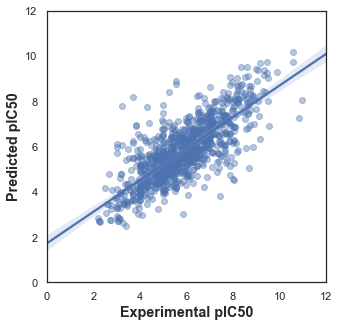

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show